# **Ejercicio 5**

## **Librerias necesarias**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import geopandas as gpd 
from urllib.request import urlopen
from numpy import mean
from tabulate import tabulate
from scipy import stats
warnings.filterwarnings('ignore')

# ***Análisis descriptivo de la accidentalidad en Barranquilla.***

## **Contextualización de la base de datos**

Esta base de datos, suministrada por la Alcaldía Distrital de Barranquilla, recopila información sobre los accidentes de tránsito ocurridos en la ciudad desde 2018 hasta el 30 de junio de 2024, de acuerdo con los informes policiales de accidentes de tránsito (IPAT). Cada columna ofrece detalles específicos sobre cada incidente, como la fecha y el lugar del accidente, la cantidad de heridos, la gravedad del evento, entre otros

Inicialmente, se hace la descarga del conjunto de datos y se formatea como un DataFrame de pandas. 

In [3]:
df = pd.read_csv('C:/Users/kamac/OneDrive/Desktop/VisualizacionUN/Accidentalidad_en_Barranquilla_20240827.csv')
df.head()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
0,2018-01-01T00:00:00.000,01:30:00:am,Con heridos,Atropello,CL 87 9H 24,1.0,NaN,1,2018,January,Mon
1,2018-01-01T00:00:00.000,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,NaN,NaN,1,2018,January,Mon
2,2018-01-01T00:00:00.000,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,NaN,NaN,1,2018,January,Mon
3,2018-01-01T00:00:00.000,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,NaN,NaN,1,2018,January,Mon
4,2018-01-01T00:00:00.000,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,NaN,NaN,1,2018,January,Mon


### **Diccionario de variables**


| **Variable**               | **Descripción**                              | **Tipo de Variable** | **Categorías (si aplica)**             |
|----------------------------|----------------------------------------------|---------------------|----------------------------------------|
| `FECHA_ACCIDENTE`           | Fecha en que ocurrió el accidente            | Fecha          |                                       |
| `HORA_ACCIDENTE`            | Hora en que ocurrió el accidente             | Hora          |                                       |
| `GRAVEDAD_ACCIDENTE`        | Gravedad del accidente                       | Categórica          | Con heridos, Solo daños, Con muertos         |
| `CLASE_ACCIDENTE`           | Tipo de accidente                            | Categórica          | Atropello, Choque, Caida Ocupante, Volcamiento, Otro, Incendio      |
| `SITIO_EXACTO_ACCIDENTE`    | Ubicación exacta del accidente               | Dirección         |              |
| `CANT_HERIDOS_EN_SITIO_ACCIDENTE` | Cantidad de heridos en el sitio del accidente | Numérica (Discreta/Factor)      |                                       |
| `CANT_MUERTOS_EN_SITIO_ACCIDENTE` | Cantidad de muertos en el sitio del accidente | Numérica (Discreta/Factor)      |                                     |
| `CANTIDAD_ACCIDENTES`       | Cantidad total de accidentes registrados     | Numérica  (Discreta/Factor)          |                                       |
| `AÑO_ACCIDENTE`                  | Año en que ocurrió el accidente     | Numérica  (Discreta/Factor)       | 2018, 2019, 2020, 2021, 2022, 2023, 2024        |
| `MES_ACCIDENTE`    | Mes en que ocurrió el accidente | Categórica       | January, February, March, April, May, June, July,August, September, October, November, December       |
| `DIA_ACCIDENTE` | Dia de la semana en que ocurrió el accidente | Categórica          | Mon, Tue, Wed, Thu, Fri, Sat, Sun  |


## **Características de la base de datos**
Entender la estructura de la base de datos y la naturaleza de la información contenida es fundamental para poder visualizar los datos de manera efectiva. Por esta razón, en esta sección se examinarán la dimensión de la base de datos y los diferentes tipos de variables que se encuentran en ella.

### **Dimension de la base de datos**

In [46]:
df.shape

(25610, 11)

Usando la función `shape`, podemos determinar que la base de datos contiene 25,610 observaciones y 11 variables.

### **Información sobre el conjunto de datos**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25610 entries, 0 to 25609
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA_ACCIDENTE                   25610 non-null  object 
 1   HORA_ACCIDENTE                    25610 non-null  object 
 2   GRAVEDAD_ACCIDENTE                25610 non-null  object 
 3   CLASE_ACCIDENTE                   25610 non-null  object 
 4   SITIO_EXACTO_ACCIDENTE            25610 non-null  object 
 5   CANT_HERIDOS_EN _SITIO_ACCIDENTE  9984 non-null   float64
 6   CANT_MUERTOS_EN _SITIO_ACCIDENTE  252 non-null    float64
 7   CANTIDAD_ACCIDENTES               25610 non-null  int64  
 8   AÑO_ACCIDENTE                     25610 non-null  int64  
 9   MES_ACCIDENTE                     25610 non-null  object 
 10  DIA_ACCIDENTE                     25610 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.1+ MB


El conjunto de datos contiene cuatro variables numéricas (`CANT_HERIDOS_EN_SITIO_ACCIDENTE`, `CANT_MUERTOS_EN_SITIO_ACCIDENTE`, `CANTIDAD_ACCIDENTES`, ` AÑO_ACCIDENTE ` ) y siete variables categóricas.

## **Variables numéricas**

A continuación se explorán las variables numéricas.

In [48]:
df.describe()

,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE
count,9984.000000,252.000000,25610.000000,25610.000000
mean,1.471655,1.035714,1.000195,2020.100547
std,1.156751,0.185946,0.013972,1.713887
min,1.000000,1.000000,1.000000,2018.000000
25%,1.000000,1.000000,1.000000,2019.000000
50%,1.000000,1.000000,1.000000,2020.000000
75%,2.000000,1.000000,1.000000,2021.000000
max,42.000000,2.000000,2.000000,2024.000000


Mediante el uso de la función `describe()`, es posible observar las principales estadísticas descriptivas de cada variable numérica.

### **Variables: Cantidad de heridos y muertos en sitio del accidente**

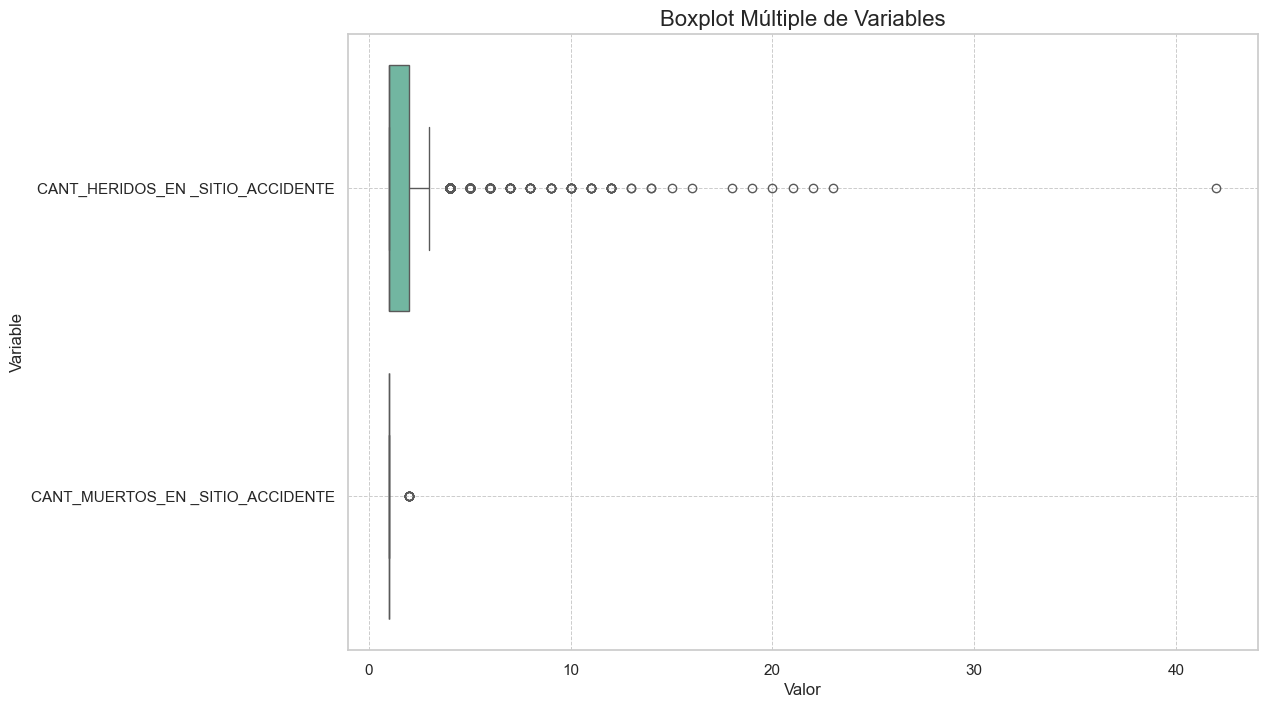

In [49]:
df_nu = df[['CANT_HERIDOS_EN _SITIO_ACCIDENTE', 'CANT_MUERTOS_EN _SITIO_ACCIDENTE']]
df_long = pd.melt(df_nu, var_name = 'Variable', value_name = 'Valor')
sns.set(style = "whitegrid")
plt.figure(figsize=(14, 8))
sns.boxplot(x = 'Valor', y = 'Variable', data = df_long, orient = 'h', palette = "Set2")
plt.xlabel('Valor', fontsize = 12)
plt.ylabel('Variable', fontsize = 12)
plt.title('Boxplot Múltiple de Variables', fontsize = 16)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.7)
plt.subplots_adjust(left = 0.2, right = 0.85)
plt.show()

El análisis de la tabla y la gráfica muestra que en los 9984 registros de accidentes, el promedio de heridos en el sitio del accidente es de 1.47, con un mínimo de 1 y un máximo de 42 heridos. La mayoría de los accidentes tienen entre 1 y 2 heridos, como lo indican los percentiles. En cuanto a las muertes en el sitio del accidente, en 252 registros, el promedio es de aproximadamente 1, con un mínimo de 1 y un máximo de 2 muertes. La columna de cantidad de accidentes indica que la mayoría de los casos son incidentes únicos, mientras que la columna del año muestra que los datos cubren un rango de 2018 a 2024, con una distribución bastante uniforme en los años analizados.

### **Correlación entre variables numéricas**

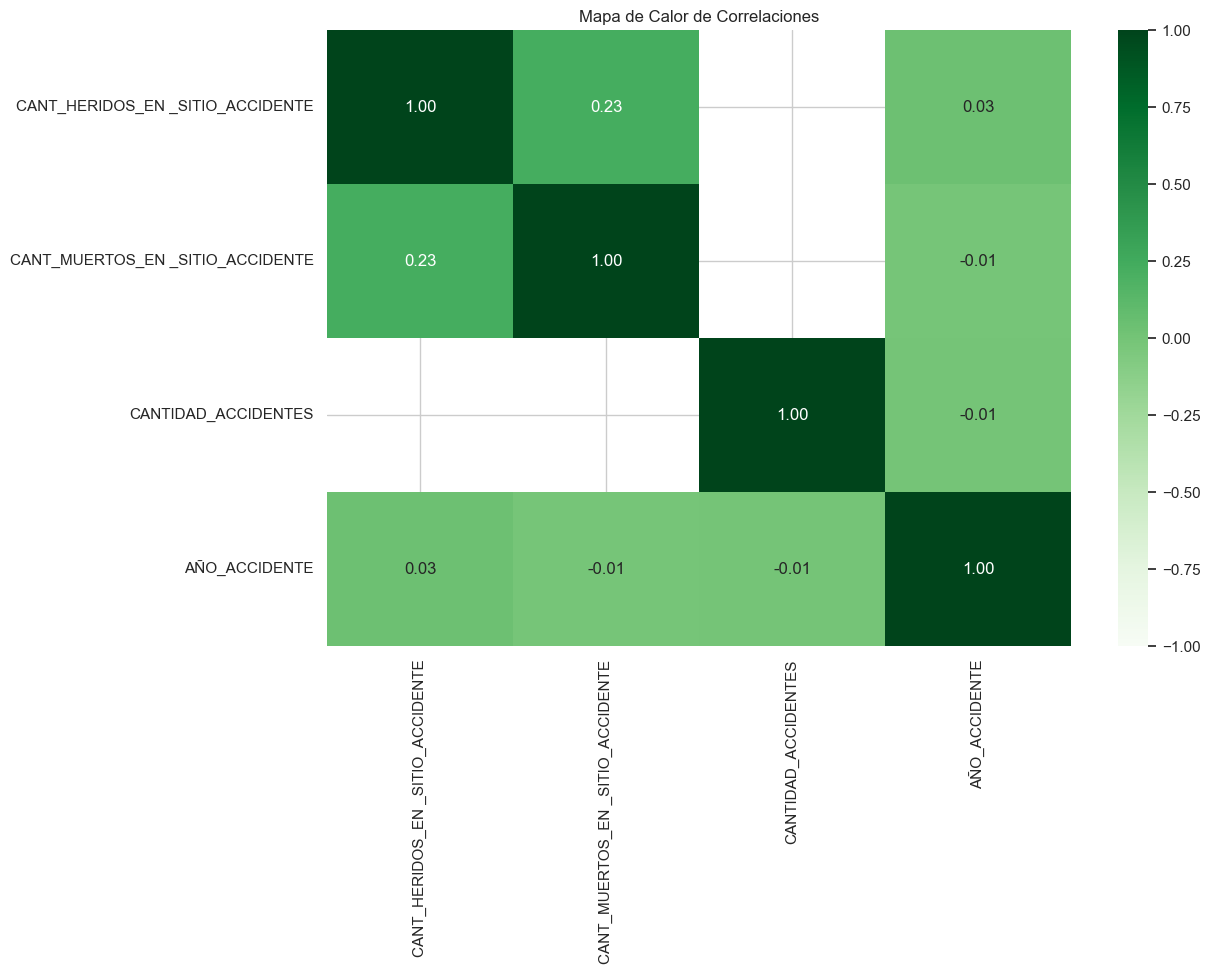

In [50]:
df_num = df[['CANT_HERIDOS_EN _SITIO_ACCIDENTE', 'CANT_MUERTOS_EN _SITIO_ACCIDENTE','CANTIDAD_ACCIDENTES','AÑO_ACCIDENTE']]
matriz_correlacion = df_num.corr()
plt.figure(figsize=(12, 8)) # Configuración del tamaño de la figura
sns.heatmap(matriz_correlacion, annot = True, cmap = 'Greens', fmt = '.2f', vmin = -1, vmax = 1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Al analizar las variables mediante una matriz de correlaciones, observamos que no muestran una relación significativa entre sí. Esto sugiere una posible independencia entre las variables y una baja correlación lineal. Esta situación podría deberse a que, aunque las variables se clasifican como numéricas, no son continuas.

## **Variables categóricas**
A continuación se explorán las variables categóricas.

In [51]:
df.describe(include = object)

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
count,25610,25610,25610,25610,25610,25610,25610
unique,2357,871,3,6,15365,12,7
top,2018-06-08T00:00:00.000,03:00:00:pm,Solo daños,Choque,CL 110 CR 9G,February,Tue
freq,34,408,15457,23819,77,2477,4009


### **Variable: Gravedad del accidente**

In [52]:
conteo = df['GRAVEDAD_ACCIDENTE'].value_counts()
porcentaje = (conteo / len(df)) * 100
conteo

GRAVEDAD_ACCIDENTE
Solo daños     15457
Con heridos     9901
Con muertos      252
Name: count, dtype: int64

In [53]:
porcentaje

GRAVEDAD_ACCIDENTE
Solo daños     60.355330
Con heridos    38.660679
Con muertos     0.983991
Name: count, dtype: float64

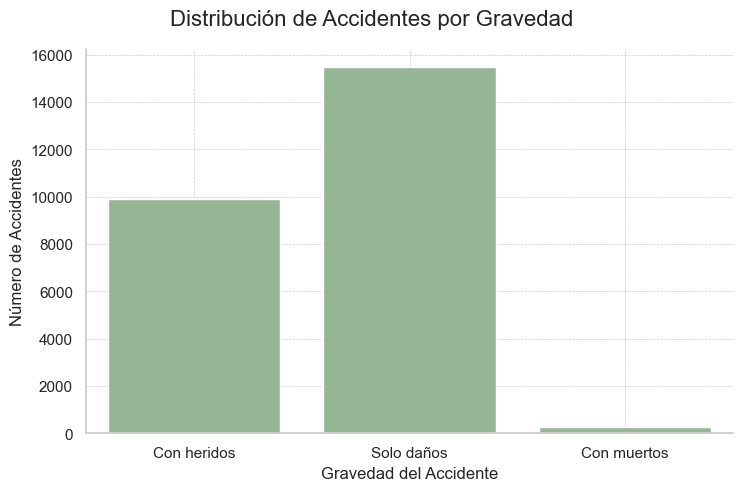

In [54]:
ax = sns.catplot(data = df, x = 'GRAVEDAD_ACCIDENTE', aspect = 1.5, kind = "count", color = "#8FBC8F")
ax.set_axis_labels('Gravedad del Accidente', 'Número de Accidentes')
ax.fig.suptitle('Distribución de Accidentes por Gravedad', fontsize = 16)
sns.set_style("whitegrid") 
plt.subplots_adjust(top=0.9) # Ajusta el espacio para el título
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.show()

Utilizando el método `value_counts()`, se puede observar la frecuencia de cada categoría en la variable `GRAVEDAD_ACCIDENTE`. Al ver la gráfica y la frecuencia de los datos en cuanto a la variable`GRAVEDAD_ACCIDENTE`, se puede afirmar que aproximadamente el 60% (15457) de los accidentes resultaron en solo daños materiales, el 39% (9901) en heridos, y el 1% (252) restante en fallecidos

### **Variable: Clase del accidente**

In [55]:
df['CLASE_ACCIDENTE'].value_counts()

CLASE_ACCIDENTE
Choque            23819
Atropello          1344
Caida Ocupante      194
Otro                123
Volcamiento         117
Incendio             13
Name: count, dtype: int64

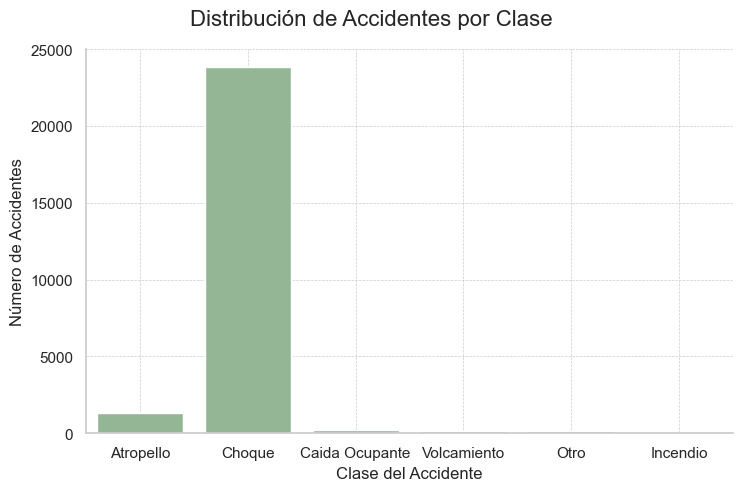

In [56]:
ax = sns.catplot(data = df, x = 'CLASE_ACCIDENTE', aspect = 1.5, kind = "count", color = "#8FBC8F")
ax.set_axis_labels('Clase del Accidente', 'Número de Accidentes')
ax.fig.suptitle('Distribución de Accidentes por Clase', fontsize=16)
sns.set_style("whitegrid")
plt.subplots_adjust(top = 0.9)
plt.grid(True, which ='both', linestyle = '--', linewidth = 0.5)
plt.show()

Al ver la gráfica y la frecuencia de los datos en cuanto a la variable`CLASE_ACCIDENTE`, se puede afirmar que la clase de accidente más común del conjunto de datos fue producida por choques. 

### **Variable: Mes del accidente**

In [57]:
df['MES_ACCIDENTE'].value_counts()

MES_ACCIDENTE
February     2477
March        2446
January      2349
December     2189
May          2121
June         2103
October      2090
April        2010
November     1995
September    1980
July         1932
August       1918
Name: count, dtype: int64

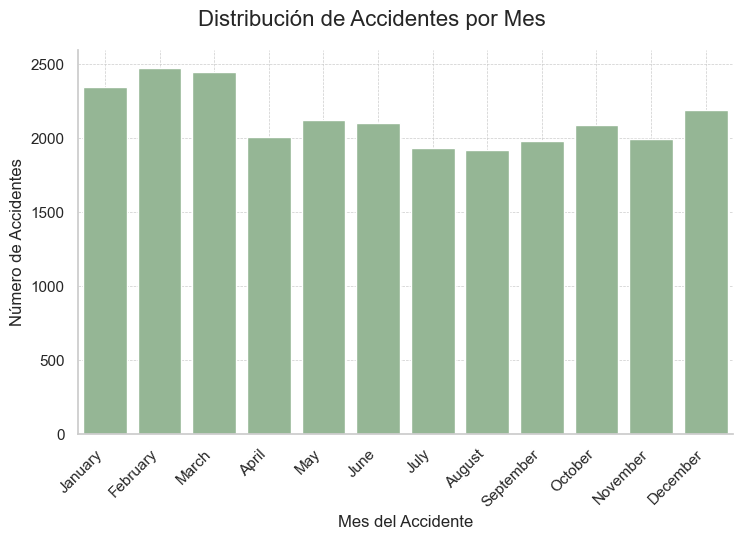

In [58]:
ax = sns.catplot(data = df, x = 'MES_ACCIDENTE', aspect = 1.5, kind = "count", color = "#8FBC8F")
ax.set_axis_labels('Mes del Accidente', 'Número de Accidentes')
ax.fig.suptitle('Distribución de Accidentes por Mes', fontsize=16)
sns.set_style("whitegrid")
plt.subplots_adjust(top = 0.9)
plt.xticks(rotation = 45, ha = 'right')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.show()


El análisis de la variable `MES_ACCIDENTE` muestra que febrero es el mes con la mayor cantidad de accidentes de tránsito, con 2,477 ocurrencias, seguido de cerca por marzo con 2,446 accidentes. Enero también presenta un número elevado, con 2,349 accidentes. En contraste, agosto es el mes con la menor cantidad de accidentes, registrando 1,918 casos. Estos datos sugieren una variabilidad en la frecuencia de accidentes a lo largo del año, con picos significativos en los primeros meses

### **Variable: Día del accidente**

In [59]:
df['DIA_ACCIDENTE'].value_counts()

DIA_ACCIDENTE
Tue    4009
Fri    3920
Wed    3839
Mon    3774
Thu    3756
Sat    3735
Sun    2577
Name: count, dtype: int64

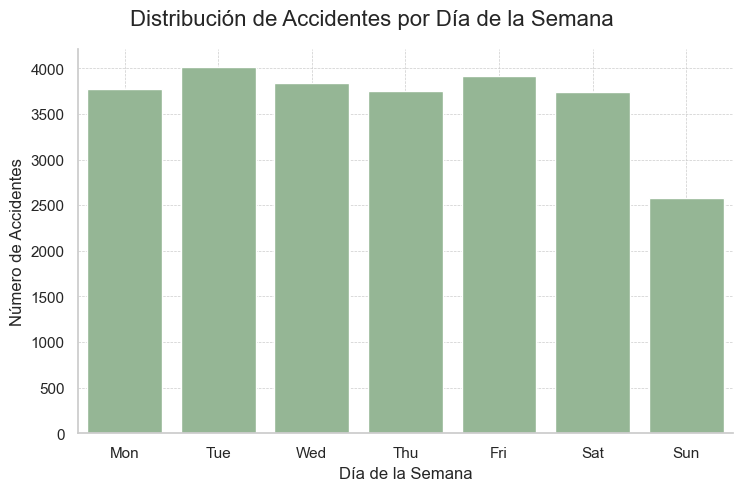

In [60]:
ax = sns.catplot(data = df, x = 'DIA_ACCIDENTE', aspect = 1.5, kind = "count", color = "#8FBC8F")
ax.set_axis_labels('Día de la Semana', 'Número de Accidentes')
ax.fig.suptitle('Distribución de Accidentes por Día de la Semana', fontsize = 16)
sns.set_style("whitegrid")
plt.subplots_adjust(top = 0.9)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.show()



La distribución de los accidentes de tránsito a lo largo de los días de la semana muestra que los días laborables, especialmente el martes y el viernes, son cuando ocurren más accidentes, con 4,009 y 3,920 casos respectivamente. Esto podría estar relacionado con el aumento del tráfico. Por otro lado, el domingo, que es generalmente un día de menor actividad y tráfico, presenta la menor cantidad de accidentes, con solo 2,577 casos. 

### **Variable: Hora del accidente**

In [61]:
hora = df['HORA_ACCIDENTE'].value_counts()
hora.sort_values()

HORA_ACCIDENTE
07:34:00:am      1
03:29:00:pm      1
12:27:00:pm      1
06:48:00:pm      1
11:26:00:am      1
              ... 
05:00:00:pm    384
08:00:00:am    384
12:30:00:pm    387
04:00:00:pm    408
03:00:00:pm    408
Name: count, Length: 871, dtype: int64

In [62]:
df['HORA_ACCIDENTE'].mode()

0    03:00:00:pm
1    04:00:00:pm
Name: HORA_ACCIDENTE, dtype: object

La variable `HORA_ACCIDENTE` muestra que las horas con mayor incidencia de accidentes de tránsito son las 3:00 PM y las 4:00 PM, con 408 casos cada una. Esto se confirma utilizando la función `mode()`, que identifica estas dos horas como las modas. Además, hay una gran variabilidad en las horas de ocurrencia de los accidentes, ya que existen muchas horas con solo un accidente reportado.

## **Filtración de la base de datos**


A continuación se filtrará el DataFrame de 5 maneras distintas, según diferentes condiciones. Este tipo de análisis es útil para enfocar la atención en casos específicos que pueden ser de interés particular para estudios más detallados.

### **Filtro 1**
- Gravedad del Accidente: Solo se incluyen los accidentes clasificados como "Con muertos".
- Clase de Accidente: Solo se incluyen los accidentes que fueron choques.
- Año del Accidente: Se seleccionan únicamente los accidentes ocurridos en los años 2020 o 2022.
- Día del Accidente: Se filtran los accidentes que ocurrieron un martes ("Tue").
- Cantidad de Accidentes: Solo se incluyen los registros donde la cantidad de accidentes es 1.

In [63]:
df_filtrado1 = df[(df['GRAVEDAD_ACCIDENTE'] == 'Con muertos') & 
                 (df['CLASE_ACCIDENTE'] == 'Choque') &
                 (df['AÑO_ACCIDENTE'].isin([2020, 2022])) &
                 (df['DIA_ACCIDENTE'] == 'Tue') & 
                 (df['CANTIDAD_ACCIDENTES'] == 1)]

df_filtrado1


,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
13179,2020-07-07T00:00:00.000,03:20:00:pm,Con muertos,Choque,CL 110 CR 6A 40,NaN,1.0,1,2020,July,Tue
13992,2020-10-20T00:00:00.000,11:20:00:pm,Con muertos,Choque,DIAG 74C CR 15,2.0,1.0,1,2020,October,Tue
22602,2022-09-06T00:00:00.000,12:05:00:pm,Con muertos,Choque,CALLE 70C CARRERA 24,NaN,1.0,1,2022,September,Tue


Este filtrado ha reducido el conjunto de datos a solo aquellos accidentes que son particularmente graves (con muertos), ocurrieron en martes durante los años 2020 o 2022, fueron choques, y fueron incidentes únicos. En total se encontraron tres observaciones con las condiciones dadas.

### **Filtro 2**
#### Accidentes de tipo choque ocurridos en días laborales (lunes a viernes) durante el mes de diciembre de cualquier año

In [64]:
df_filtrado2 = df[(df['CLASE_ACCIDENTE'] == 'Choque') &
             (df['DIA_ACCIDENTE'].isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])) &
             (df['MES_ACCIDENTE'] == 'December')]
df_filtrado2.shape


(1536, 11)

In [65]:
df_filtrado2.head()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
5411,2018-12-03T00:00:00.000,01:40:00:pm,Solo daños,Choque,VIA 40 CALLE 110,NaN,NaN,1,2018,December,Mon
5412,2018-12-03T00:00:00.000,02:00:00:pm,Solo daños,Choque,CALLE 30 CARRERA 20-69,NaN,NaN,1,2018,December,Mon
5413,2018-12-03T00:00:00.000,02:10:00:pm,Solo daños,Choque,VIA GALAPA KM 115 + 200,NaN,NaN,1,2018,December,Mon
5414,2018-12-03T00:00:00.000,02:40:00:pm,Solo daños,Choque,DIAGONAL 5 CARRERA 9 PUENTE PUMAREJO,NaN,NaN,1,2018,December,Mon
5415,2018-12-03T00:00:00.000,03:40:00:pm,Solo daños,Choque,CALLE 74 CARRERA 41C,NaN,NaN,1,2018,December,Mon


Este filtrado ha reducido el conjunto de datos a solo aquellos accidentes de tipo "choque" que ocurrieron en días laborales (de lunes a viernes) durante el mes de diciembre, sin importar el año. En total se encontraron 1,536 observaciones que cumplen con estas condiciones. Para verificar la cantidad de datos restantes después del filtrado, se utilizó la función `shape`.

### **Filtro 3**
#### Accidentes ocurridos durante la noche (entre 7 PM y 11 PM) en los años 2019 y 2020, de cualquier tipo de accidente

In [66]:
df_filtrado3 = df[(df['HORA_ACCIDENTE'].between('07:00:00 pm', '11:00:00 pm')) &
              (df['AÑO_ACCIDENTE'].isin([2019, 2020]))]
df_filtrado3.shape

(3445, 11)

In [67]:
df_filtrado3.head()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
5902,2019-01-01T00:00:00.000,10:30:00:pm,Con heridos,Atropello,CL 99D CR 8E,3.0,NaN,1,2019,January,Tue
5909,2019-01-02T00:00:00.000,08:20:00:am,Con heridos,Choque,CR 22 CL 37,1.0,NaN,1,2019,January,Wed
5910,2019-01-02T00:00:00.000,08:30:00:am,Con heridos,Choque,CR 11 CL 40,2.0,NaN,1,2019,January,Wed
5920,2019-01-03T00:00:00.000,07:20:00:am,Solo daños,Choque,CL 19 CR 5C,NaN,NaN,1,2019,January,Thu
5921,2019-01-03T00:00:00.000,08:40:00:am,Solo daños,Choque,CALLE 39 CRA 27,NaN,NaN,1,2019,January,Thu


Este filtrado ha reducido el conjunto de datos a solo aquellos accidentes ocurridos durante la noche, específicamente entre las 7 PM y las 11 PM, en los años 2019 y 2020, sin importar el tipo de accidente. En total se encontraron 3,445 observaciones que cumplen con estas condiciones.

### **Filtro 4**
#### Accidentes ocurridos entre las 6:00 AM y las 12:00 PM con exactamente 2 accidentes reportados

In [68]:
df_filtrado4= df[(df['HORA_ACCIDENTE'].between('06:00:00 am', '12:00:00 pm')) &
              (df['CANTIDAD_ACCIDENTES'] == 2)]
df_filtrado4

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
2602,2018-06-09T00:00:00.000,09:35:00:am,Solo daños,Choque,CARRERA 38 CALLE 52,NaN,NaN,2,2018,June,Sat
12038,2020-02-06T00:00:00.000,09:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 27,NaN,NaN,2,2020,February,Thu
12837,2020-05-02T00:00:00.000,07:40:00:pm,Solo daños,Choque,CR 46 87 27,NaN,NaN,2,2020,May,Sat


Este filtrado ha reducido el conjunto de datos a los accidentes ocurridos entre las 6:00 AM y las 12:00 PM que reportaron exactamente 2 accidentes en el sitio. En total se encontraron 3 observaciones que cumplen con estas condiciones. 

### **Filtro 5**
####  Accidentes ocurridos los días miércoles y jueves en los años 2020 y 2021, en la franja horaria de la mañana (entre 6 AM y 12 PM)

In [69]:
df_filtrado5 = df[(df['DIA_ACCIDENTE'].isin(['Wed', 'Thu'])) &
             (df['AÑO_ACCIDENTE'].isin([2020, 2021])) &
             (df['HORA_ACCIDENTE'].between('06:00:00 am', '12:00:00 pm'))]
df_filtrado5.shape

(1296, 11)

In [70]:
df_filtrado5.head()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
11546,2020-01-01T00:00:00.000,08:00:00:pm,Con heridos,Choque,CL 86 CR 9L,1.0,NaN,1,2020,January,Wed
11547,2020-01-01T00:00:00.000,08:10:00:pm,Solo daños,Choque,CL 72 CR 44 25,NaN,NaN,1,2020,January,Wed
11548,2020-01-01T00:00:00.000,09:00:00:pm,Solo daños,Choque,CL 19 CR 2,NaN,NaN,1,2020,January,Wed
11549,2020-01-01T00:00:00.000,09:00:00:pm,Solo daños,Choque,CR 6 89 87,NaN,NaN,1,2020,January,Wed
11550,2020-01-01T00:00:00.000,09:30:00:pm,Solo daños,Choque,CL 72 CR 41,NaN,NaN,1,2020,January,Wed


Este filtrado ha reducido el conjunto de datos a los accidentes ocurridos los días miércoles y jueves durante los años 2020 y 2021, en la franja horaria de la mañana (entre las 6:00 AM y las 12:00 PM). En total se encontraron 1,296 observaciones que cumplen con estas condiciones. 

## **Identificación y tratamiento de valores NA**

### **Identificación de datos faltantes**

En esta parte se realiza un análisis para identificar la cantidad y el porcentaje de datos faltantes en cada columna del DataFrame. Primero, se utiliza la biblioteca missingno para generar una visualización en forma de barra que muestra el porcentaje de datos faltantes en cada columna, ordenados de manera ascendente. Luego, se utiliza un bucle for para iterar sobre cada columna del DataFrame, contando los valores faltantes (NaN) y calculando el porcentaje que estos representan respecto al total de observaciones en el DataFrame.

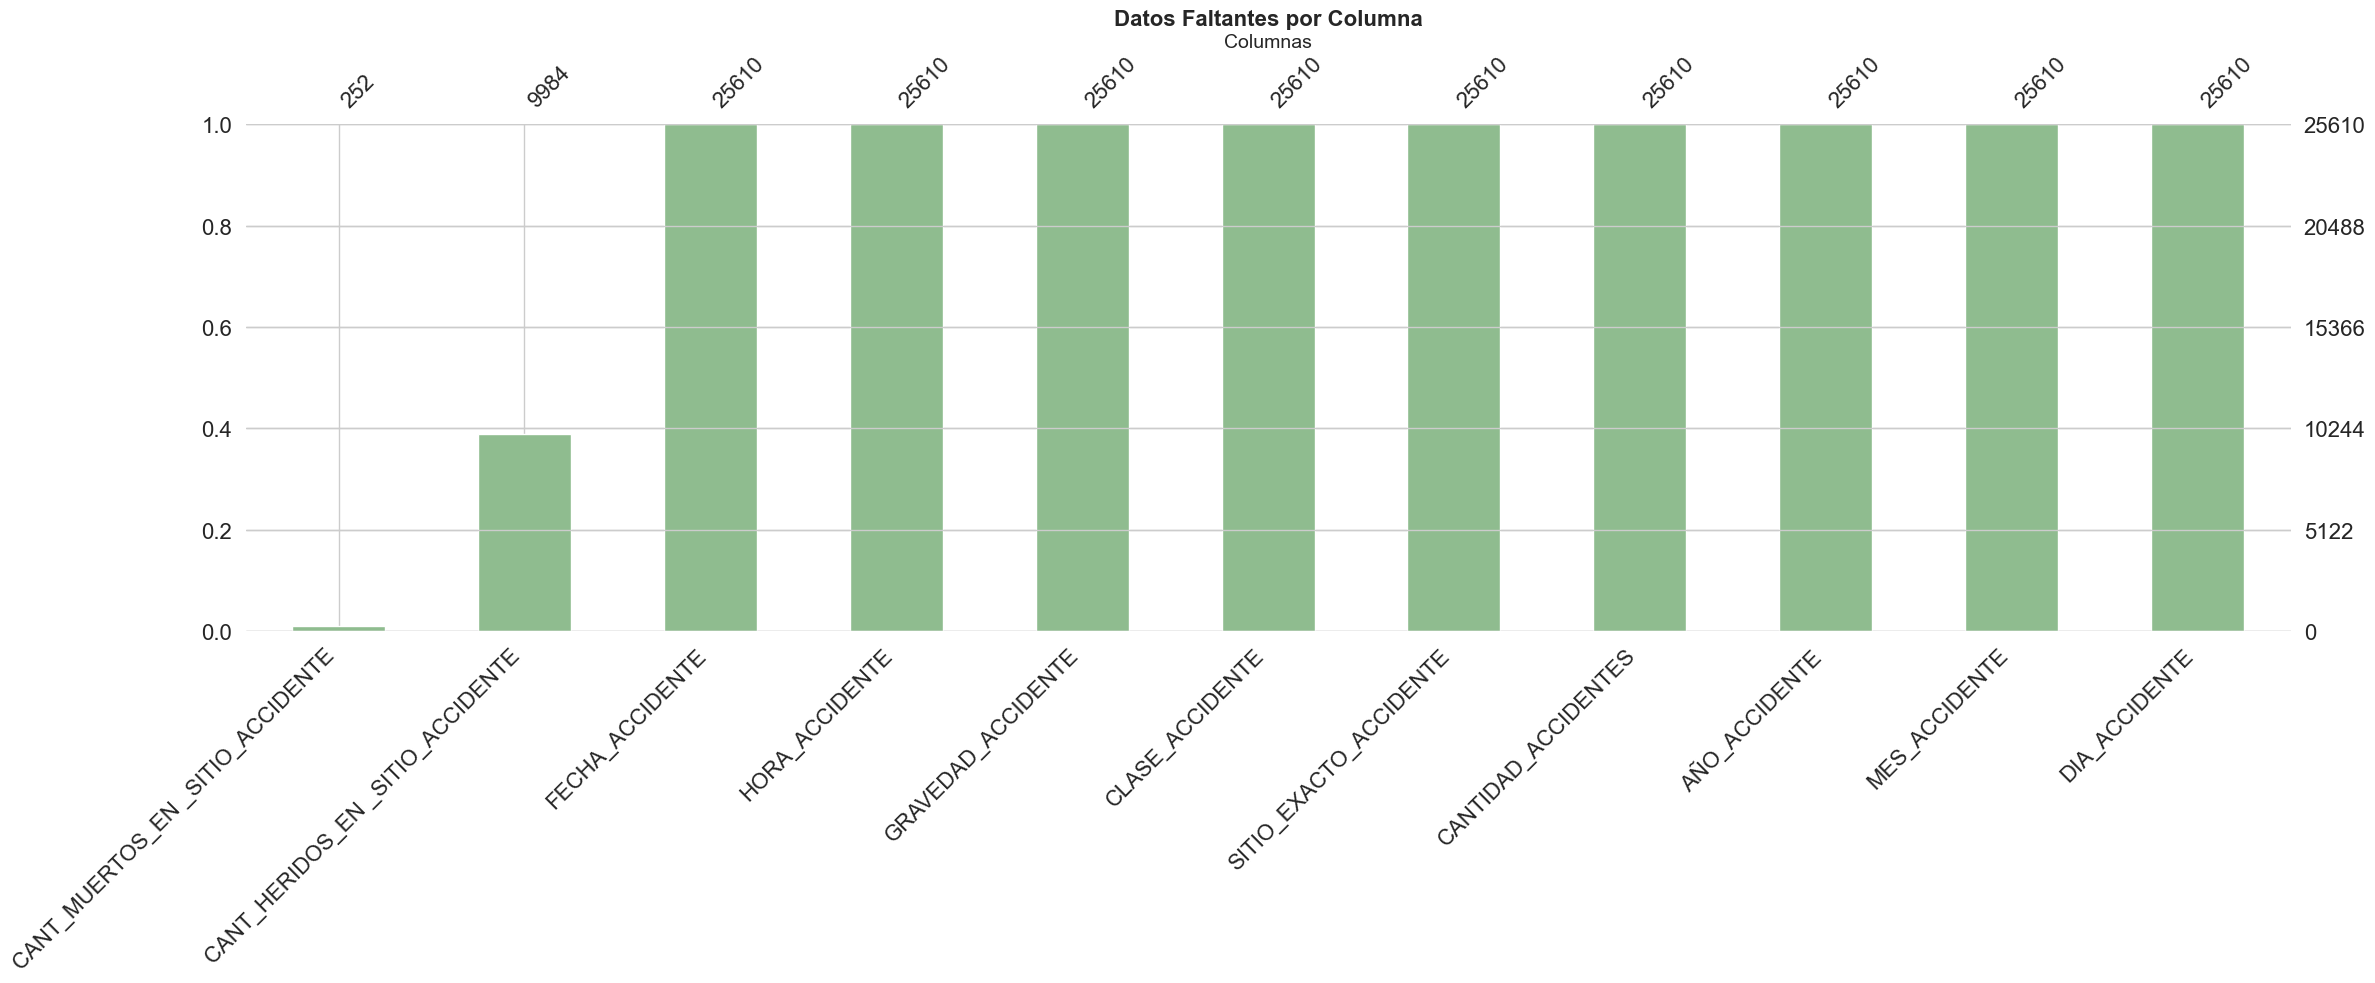

In [71]:
msno.bar(df, color = "#8FBC8F", sort = 'ascending')
plt.title('Datos Faltantes por Columna', fontsize = 16, fontweight = 'bold')
plt.xlabel('Columnas', fontsize = 14)
plt.ylabel('Porcentaje de Datos Faltantes', fontsize = 14)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.tight_layout() # Asegura que todo el contenido del gráfico se ajuste correctamente dentro de la figura.
plt.show()

In [72]:
for i in range(df.shape[1]):
    column_name = df.columns[i]  # Obtiene el nombre de la columna
    n_miss = df[column_name].isnull().sum()  # Cuenta los valores NaN en la columna
    perc = n_miss / df.shape[0] * 100  # Calcula el porcentaje de NaN
    print('  %s, Missing: %d (%.1f%%)' % (column_name, n_miss, perc))

  FECHA_ACCIDENTE, Missing: 0 (0.0%)
  HORA_ACCIDENTE, Missing: 0 (0.0%)
  GRAVEDAD_ACCIDENTE, Missing: 0 (0.0%)
  CLASE_ACCIDENTE, Missing: 0 (0.0%)
  SITIO_EXACTO_ACCIDENTE, Missing: 0 (0.0%)
  CANT_HERIDOS_EN _SITIO_ACCIDENTE, Missing: 15626 (61.0%)
  CANT_MUERTOS_EN _SITIO_ACCIDENTE, Missing: 25358 (99.0%)
  CANTIDAD_ACCIDENTES, Missing: 0 (0.0%)
  AÑO_ACCIDENTE, Missing: 0 (0.0%)
  MES_ACCIDENTE, Missing: 0 (0.0%)
  DIA_ACCIDENTE, Missing: 0 (0.0%)



Los resultados permiten deducir que  las variables `CANT_HERIDOS_EN _SITIO_ACCIDENTE` y `CANT_MUERTOS_EN _SITIO_ACCIDENTE` presentan una cantidad significativa de datos faltantes, con 15,626 observaciones faltantes (61.0%) y 25,358 observaciones faltantes (99.0%), respectivamente.
El resto de las columnas no tienen datos faltantes, es decir, el porcentaje de valores faltantes es 0% para todas ellas.

### **Tratamiento de datos faltantes**

Las variables `CANT_HERIDOS_EN _SITIO_ACCIDENTE` y `CANT_MUERTOS_EN _SITIO_ACCIDENTE` pueden ser consideradas como factores, ya que sus valores no son continuos. Por lo tanto, no es necesario realizar una imputación en estas variables. Esto se debe a que los valores NA en estas variables pueden representar de manera adecuada la información relacionada con las consecuencias del accidente.

#### **Variable: Cantidad de heridos en sitio del accidente**

El objetivo de este filtrado es identificar aquellos casos donde, a pesar de que el accidente tuvo una gravedad significativa ("Con muertos") o no tuvo heridos ("Solo daños"), no se registraron heridos en el sitio del accidente.


In [73]:
heridos_f = df[
    df['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].isna() &
    (df['GRAVEDAD_ACCIDENTE'].isin(['Solo daños', 'Con muertos']))
]
heridos_f.head()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
1,2018-01-01T00:00:00.000,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,NaN,NaN,1,2018,January,Mon
2,2018-01-01T00:00:00.000,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,NaN,NaN,1,2018,January,Mon
3,2018-01-01T00:00:00.000,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,NaN,NaN,1,2018,January,Mon
4,2018-01-01T00:00:00.000,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,NaN,NaN,1,2018,January,Mon
7,2018-01-02T00:00:00.000,02:30:00:pm,Solo daños,Choque,CARRERA 25 37-42,NaN,NaN,1,2018,January,Tue


In [74]:
heridos_f.tail()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
25489,2024-06-01T00:00:00.000,02:50:00:am,Con muertos,Atropello,CALLE 30 # 8 - 11,NaN,1.0,1,2024,June,Sat
25509,2024-06-05T00:00:00.000,11:15:00:pm,Con muertos,Choque,CALLE 110 CARRERA 37,NaN,1.0,1,2024,June,Wed
25526,2024-06-09T00:00:00.000,03:00:00:am,Con muertos,Choque,CALLE 19 CON CRA 7A,NaN,1.0,1,2024,June,Sun
25584,2024-06-24T00:00:00.000,09:45:00:am,Solo daños,Choque,TRANSVERSAL 44 CON CALLE 102 - 72,NaN,NaN,1,2024,June,Mon
25608,2024-06-30T00:00:00.000,05:00:00:pm,Con muertos,Choque,CARRERA 43 CON CALLE 41,NaN,1.0,1,2024,June,Sun



El resultado muestra las 5 primeras y 5 últimas filas de los datos filtrados, donde se observa que todas las entradas cumplen con estas condiciones: no tienen información sobre heridos (NaN en la columna `CANT_HERIDOS_EN _SITIO_ACCIDENTE`) y corresponden a accidentes clasificados como "Solo daños" o "Con muertos". 

La imputación de valores faltantes en esta variable no es realmente necesaria, ya que se observa que los NA's en esta variable tienden a aparecer cuando la variable `GRAVEDAD_ACCIDENTE` toma los valores "Con muertos" o "Solo daños", lo que indica una relación directa entre la gravedad del accidente y la ausencia de datos en la variable `CANT_HERIDOS_EN _SITIO_ACCIDENTE`



#### **Variable: Cantidad de muertos en sitio del accidente**

El objetivo de este filtrado es encontrar casos en los que, a pesar de que el accidente fue grave en términos de heridos o solo daños, no se reportaron fallecidos (NaN en la columna `CANT_MUERTOS_EN _SITIO_ACCIDENTE`).

In [75]:
muertos_f = df[
    df['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].isna() &
    (df['GRAVEDAD_ACCIDENTE'].isin(['Solo daños', 'Con heridos']))
]
muertos_f.head()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
0,2018-01-01T00:00:00.000,01:30:00:am,Con heridos,Atropello,CL 87 9H 24,1.0,NaN,1,2018,January,Mon
1,2018-01-01T00:00:00.000,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,NaN,NaN,1,2018,January,Mon
2,2018-01-01T00:00:00.000,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,NaN,NaN,1,2018,January,Mon
3,2018-01-01T00:00:00.000,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,NaN,NaN,1,2018,January,Mon
4,2018-01-01T00:00:00.000,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,NaN,NaN,1,2018,January,Mon


In [76]:
muertos_f.tail()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
25604,2024-06-29T00:00:00.000,10:00:00:pm,Con heridos,Choque,CARRERA 5C CALLE 90,2.0,NaN,1,2024,June,Sat
25605,2024-06-29T00:00:00.000,10:15:00:am,Con heridos,Choque,CARRERA 42G CALLE 90,1.0,NaN,1,2024,June,Sat
25606,2024-06-30T00:00:00.000,02:00:00:am,Con heridos,Choque,CALLE 116 CARRERA 38,1.0,NaN,1,2024,June,Sun
25607,2024-06-30T00:00:00.000,02:00:00:pm,Con heridos,Choque,CALLE 56 FRENTE AL # 8E - 48,2.0,NaN,1,2024,June,Sun
25609,2024-06-30T00:00:00.000,06:30:00:pm,Con heridos,Atropello,CARRERA 8 CALLE 49,2.0,NaN,1,2024,June,Sun


La variable `CANT_MUERTOS_EN _SITIO_ACCIDENTE` tiene un total de 25,358 observaciones faltantes, lo que representa el 99% del total de observaciones. Es importante destacar que este número corresponde a la suma de las observaciones en las categorías de `GRAVEDAD_ACCIDENTE` "Con heridos" (9901) y "Solo daños" (15457). Esto podría indicar que, más que tratarse de datos faltantes, la ausencia de datos en la variable `CANT_MUERTOS_EN _SITIO_ACCIDENTE` refleja que no hubo muertos en esos accidentes, sino solo heridos o daños materiales. Por lo tanto, la presencia de NA's en esta variable puede interpretarse como un indicador de que el accidente no resultó en ninguna fatalidad, sino en consecuencias menos graves.

## **Valores atípicos**


En esta parte, las variables numéricas se pueden considerar como factores o variables continuas discretas. Por lo tanto, la identificación de datos atípicos no será particularmente útil, dado que no se dispone de un rango continuo de valores que permita detectar desviaciones significativas. En su lugar, se calcularán tablas de frecuencias para observar la distribución de las categorías y entender mejor cómo se distribuyen los valores en estas variables discretas, lo que permitirá un análisis más adecuado y relevante para este tipo de datos.

### **Variable: Cantidad de heridos en sitio de accidente**

In [77]:
df['CANT_HERIDOS_EN _SITIO_ACCIDENTE'].unique()

array([ 1., nan,  3.,  2.,  5.,  7.,  8.,  4., 11.,  6., 10., 12., 20.,
       22., 13.,  9., 16., 14., 42., 19., 21., 23., 18., 15.])

In [78]:
bins = [0, 5, 10, 15, 20, 25, 50]
labels = ['1 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 50']
df['Intervalo'] = pd.cut(df['CANT_HERIDOS_EN _SITIO_ACCIDENTE'], bins = bins, labels = labels, right = False)
table = df['Intervalo'].value_counts().sort_index().reset_index()
table.columns = ['Número de Heridos', 'Frecuencia']
print(tabulate(table, headers = 'keys', tablefmt = 'fancy_grid', showindex=False))


╒═════════════════════╤══════════════╕
│ Número de Heridos   │   Frecuencia │
╞═════════════════════╪══════════════╡
│ 1 - 5               │         9836 │
├─────────────────────┼──────────────┤
│ 6 - 10              │          115 │
├─────────────────────┼──────────────┤
│ 11 - 15             │           24 │
├─────────────────────┼──────────────┤
│ 16 - 20             │            4 │
├─────────────────────┼──────────────┤
│ 21 - 25             │            4 │
├─────────────────────┼──────────────┤
│ 26 - 50             │            1 │
╘═════════════════════╧══════════════╛


Este análisis permite observar que la mayoría de los accidentes reportan entre 1 y 5 heridos, lo que es el caso más común. Por otro lado, un único accidente reporta 42 heridos, lo que lo agrupa en el intervalo de 26-50 heridos, destacando su diferencia y gravedad en comparación con la mayoría de los datos. Este resultado resalta la importancia de evaluar estos casos raros con más detalle.

### **Variable: Cantidad de muertos en sitio de accidente**

In [79]:
df['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].unique()

array([nan,  1.,  2.])

In [80]:
table2 = df['CANT_MUERTOS_EN _SITIO_ACCIDENTE'].value_counts().reset_index()
table2.columns = ['Número de Muertos', 'Frecuencia']
print(tabulate(table2, headers = 'keys', tablefmt = 'fancy_grid', showindex=False))

╒═════════════════════╤══════════════╕
│   Número de Muertos │   Frecuencia │
╞═════════════════════╪══════════════╡
│                   1 │          243 │
├─────────────────────┼──────────────┤
│                   2 │            9 │
╘═════════════════════╧══════════════╛


Se puede observar que la mayoría de los accidentes reportan 1 muerto, lo que es el caso más común y solo 9 de todos los accidentes tuvieron 2 muertos.

### **Variable: Año del accidente**

In [81]:
table3 = df['AÑO_ACCIDENTE'].value_counts().reset_index()
table3.columns = ['Año del accidente', 'Frecuencia']
print(tabulate(table3, headers = 'keys', tablefmt = 'fancy_grid', showindex=False))

╒═════════════════════╤══════════════╕
│   Año del accidente │   Frecuencia │
╞═════════════════════╪══════════════╡
│                2018 │         5898 │
├─────────────────────┼──────────────┤
│                2019 │         5645 │
├─────────────────────┼──────────────┤
│                2021 │         4700 │
├─────────────────────┼──────────────┤
│                2022 │         3683 │
├─────────────────────┼──────────────┤
│                2020 │         3281 │
├─────────────────────┼──────────────┤
│                2023 │         1662 │
├─────────────────────┼──────────────┤
│                2024 │          741 │
╘═════════════════════╧══════════════╛


Se observa que el año 2018 tuvo el mayor número de accidentes registrados, con un total de 5898 casos, seguido por el año 2019 con 5645 accidentes. Los años siguientes muestran una tendencia general a la disminución en la frecuencia de accidentes, siendo el año 2024 el que registra la menor cantidad con 741 casos (Esto puede darse porque aún el año no ha culminado). Este descenso en el número de accidentes podría reflejar cambios en las diferentes condiciones y factores en los accidentes.

### **Variable: Cantidad de accidentes ocurridos**

In [82]:
table4 = df['CANTIDAD_ACCIDENTES'].value_counts().reset_index()
table4.columns = ['Cantidad de accidente', 'Frecuencia']
print(tabulate(table4, headers = 'keys', tablefmt = 'fancy_grid', showindex=False))

╒═════════════════════════╤══════════════╕
│   Cantidad de accidente │   Frecuencia │
╞═════════════════════════╪══════════════╡
│                       1 │        25605 │
├─────────────────────────┼──────────────┤
│                       2 │            5 │
╘═════════════════════════╧══════════════╛


En la tabla presentada, se observa que la gran mayoría de los registros corresponden a incidentes donde ocurrió un solo accidente, con un total de 25,605 casos. Solo hay 5 registros en los que se reportan dos accidentes. Este resultado es esperado, ya que los accidentes están clasificados según variables específicas como la hora, dirección, fecha, y otros datos detallados. Estas clasificaciones precisas hacen poco común que se registren múltiples accidentes bajo las mismas condiciones exactas, lo que explica la baja frecuencia de casos con dos accidentes reportados.

# **Ejercicio 5: Visualización de mapas interactivos**

## ***Análisis descriptivo del precio de combustible en Colombia 2023.***

En este análisis, trabajamos con una base de datos que contiene los precios de los combustibles en Colombia durante el año 2023. Los datos fueron descargados del sitio web oficial del Ministerio de Energía colombiano y están organizados en varios archivos CSV. Estos archivos fueron combinados en un único DataFrame para facilitar su análisis. Cada registro en la base de datos incluye información detallada sobre la estación de servicio, el tipo de combustible, la fecha de registro, y el precio del combustible en diferentes municipios y departamentos del país


## **Datos**

In [83]:
d20231 = pd.read_csv(r'C:\Users\kamac\OneDrive\Desktop\VisualizacionUN\datamapa\20231.csv')
d20232 = pd.read_csv(r'C:\Users\kamac\OneDrive\Desktop\VisualizacionUN\datamapa\20232.csv')
d20233 = pd.read_csv(r'C:\Users\kamac\OneDrive\Desktop\VisualizacionUN\datamapa\20233.csv')
d20234 = pd.read_csv(r'C:\Users\kamac\OneDrive\Desktop\VisualizacionUN\datamapa\20234.csv')

In [84]:
df_2023 = pd.concat([d20231, d20232, d20233, d20234], axis=0, ignore_index=True)
# axis = 0: concatena por filas
# ignore_index:  Sin este argumento, las filas conservarían sus índices originales, lo que podría resultar en índices duplicados.
df_2023.head()

,BANDERA,NOMBRE COMERCIAL,PRODUCTO,FECHA REGISTRO,DEPARTAMENTO,MUNICIPIO,VALOR PRECIO
0,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,DIESEL,01-Jan-2023,AMAZONAS,LA PEDRERA,15000.0
1,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LA PEDRERA,15500.0
2,TERPEL,BALSA EL CONDOR,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
3,TERPEL,BALSA EL CONDOR,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10840.0
4,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0


## **Contextualización de la base de datos**

### **Diccionario de variables**

| **Variable**          | **Descripción**                                                    | **Tipo**   | **Ejemplo**          |
|-----------------------|--------------------------------------------------------------------|------------|----------------------|
| `BANDERA`             | Identificador de la bandera del establecimiento                    | Categórica | "TERPEL"          |
| `NOMBRE COMERCIAL`    | Nombre comercial del establecimiento                               | Categórica | "ESTACION DE SERVICIO AVENIDA SEXTA"       |
| `PRODUCTO`            | Tipo de producto de combustible                                    | Categórica | "GASOLINA MOTOR" , "DIESEL", "EXTRA"          |
| `FECHA REGISTRO`      | Fecha en la que se registró el precio del combustible              | Fecha      | "01-Jan-2018"         |
| `DEPARTAMENTO`        | Nombre del departamento en el que se encuentra el establecimiento  | Categórica | "AMAZONAS"       |
| `MUNICIPIO`           | Nombre del municipio en el que se encuentra el establecimiento     | Categórica | "LETICIA"             |
| `VALOR PRECIO`        | Precio del combustible en pesos colombianos                        | Numérica   | 9030.0              |


### **Características de la base de datos**

In [85]:
df_2023.shape

(267943, 7)

Usando la función `shape`, podemos determinar que la base de datos contiene 267,943 observaciones y 7 variables.

In [86]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267943 entries, 0 to 267942
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BANDERA           267943 non-null  object 
 1   NOMBRE COMERCIAL  267943 non-null  object 
 2   PRODUCTO          267943 non-null  object 
 3   FECHA REGISTRO    267943 non-null  object 
 4   DEPARTAMENTO      267943 non-null  object 
 5   MUNICIPIO         267943 non-null  object 
 6   VALOR PRECIO      267943 non-null  float64
dtypes: float64(1), object(6)
memory usage: 14.3+ MB


El conjunto de datos contiene una variable numérica (`VALOR PRECIO`) y seis variables categóricas.

## **Análisis de las variables**

### **Variable: Producto**

In [87]:
df_2023["PRODUCTO"].unique()

array(['DIESEL', 'GASOLINA MOTOR', 'EXTRA'], dtype=object)

In [88]:
df_2023.value_counts('PRODUCTO')

PRODUCTO
GASOLINA MOTOR    127338
DIESEL            108205
EXTRA              32400
Name: count, dtype: int64

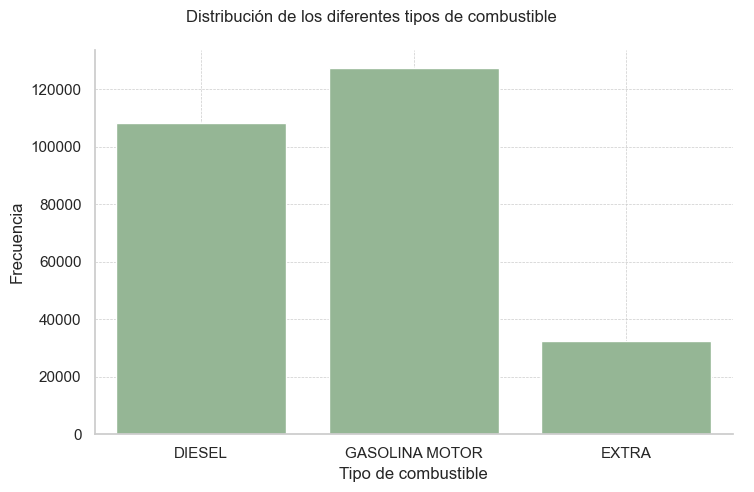

In [89]:
ax = sns.catplot(data = df_2023, x = 'PRODUCTO', aspect = 1.5, kind = "count", color = "#8FBC8F")
ax.set_axis_labels('Tipo de combustible', 'Frecuencia')
ax.fig.suptitle('Distribución de los diferentes tipos de combustible', fontsize = 12)
sns.set_style("whitegrid") 
plt.subplots_adjust(top = 0.9) 
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.show()

El análisis presentado en la gráfica muestra la distribución de los diferentes tipos de combustibles registrados. Según los datos, la gasolina motor es el tipo de combustible más común, con 127.338 registros, seguida por el diésel, que cuenta con 108.285 registros. En menor cantidad se encuentra el combustible extra, con 32.400 registros.

### **Variable: Valor precio**

In [90]:
pd.options.display.float_format = '{:.2f}'.format # Configura pandas para mostrar los números flotantes con dos decimales
df_2023['VALOR PRECIO'].describe()

count     267943.00
mean       12023.13
std        28709.79
min            0.00
25%         9350.00
50%        10880.00
75%        13849.00
max     14750147.00
Name: VALOR PRECIO, dtype: float64

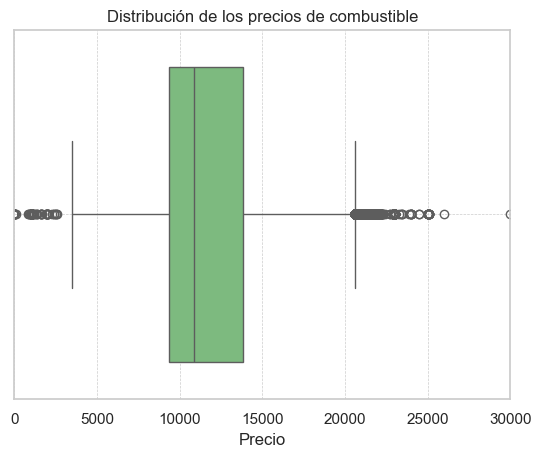

In [91]:
ax = sns.boxplot(data = df_2023, x = 'VALOR PRECIO', palette = 'Greens', orient = 'h')
ax.set_xlim(0, 30000)
ax.set_xlabel('Precio')
ax.set_title('Distribución de los precios de combustible')
sns.set_style("whitegrid") 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


El análisis estadístico de la variable `VALOR PRECIO` muestra que, de los 267.943 registros, el precio promedio es de 12,023.13 pesos, con una mediana de 10,880.00 pesos. La desviación estándar es alta, de 28,709.79 pesos, lo que sugiere una variabilidad significativa en los precios. El precio mínimo registrado es de 0.00 COP, lo que podría indicar un error en los datos, mientras que el precio máximo alcanza los 14,750,147.00 pesos, lo que también parece ser un valor atípico. Además, el 25% de los precios son inferiores a 9,350.00 pesos y el 75% son menores a 13,849.00 pesos. Este análisis refleja tanto la tendencia central como la dispersión en los precios, así como la presencia de  valores atípicos en los datos.

### **Variable: Departamento**

In [92]:
tabla = df_2023['DEPARTAMENTO'].value_counts().reset_index()
tabla.columns = ['Departamento', 'Frecuencia']
print(tabulate(tabla, headers = 'keys', tablefmt = 'fancy_grid', showindex=False))


╒══════════════════════════════════════════════════════════╤══════════════╕
│ Departamento                                             │   Frecuencia │
╞══════════════════════════════════════════════════════════╪══════════════╡
│ NARIÑO                                                   │        31054 │
├──────────────────────────────────────────────────────────┼──────────────┤
│ ANTIOQUIA                                                │        25009 │
├──────────────────────────────────────────────────────────┼──────────────┤
│ NORTE DE SANTANDER                                       │        21752 │
├──────────────────────────────────────────────────────────┼──────────────┤
│ VALLE DEL CAUCA                                          │        18754 │
├──────────────────────────────────────────────────────────┼──────────────┤
│ CUNDINAMARCA                                             │        16631 │
├──────────────────────────────────────────────────────────┼──────────────┤
│ BOGOTA D.C

Los resultados indican lo siguiente: 

Entre los departamentos con mayor número de registros se encuentran Nariño con 31.054 registros, seguido de Antioquia con 25.009 registros y Norte de Santander con 21.752 registros. Estos departamentos parecen tener una mayor actividad o más estaciones de servicio reportando precios de combustible.

Por otro lado, los departamentos con menor número de registros son Guainía con 261 registros y Vaupés con solo 153 registros. Esto podría indicar una menor densidad de estaciones de servicio en estos departamentos o menos reportes de precios.

## **Identificación de datos faltantes**

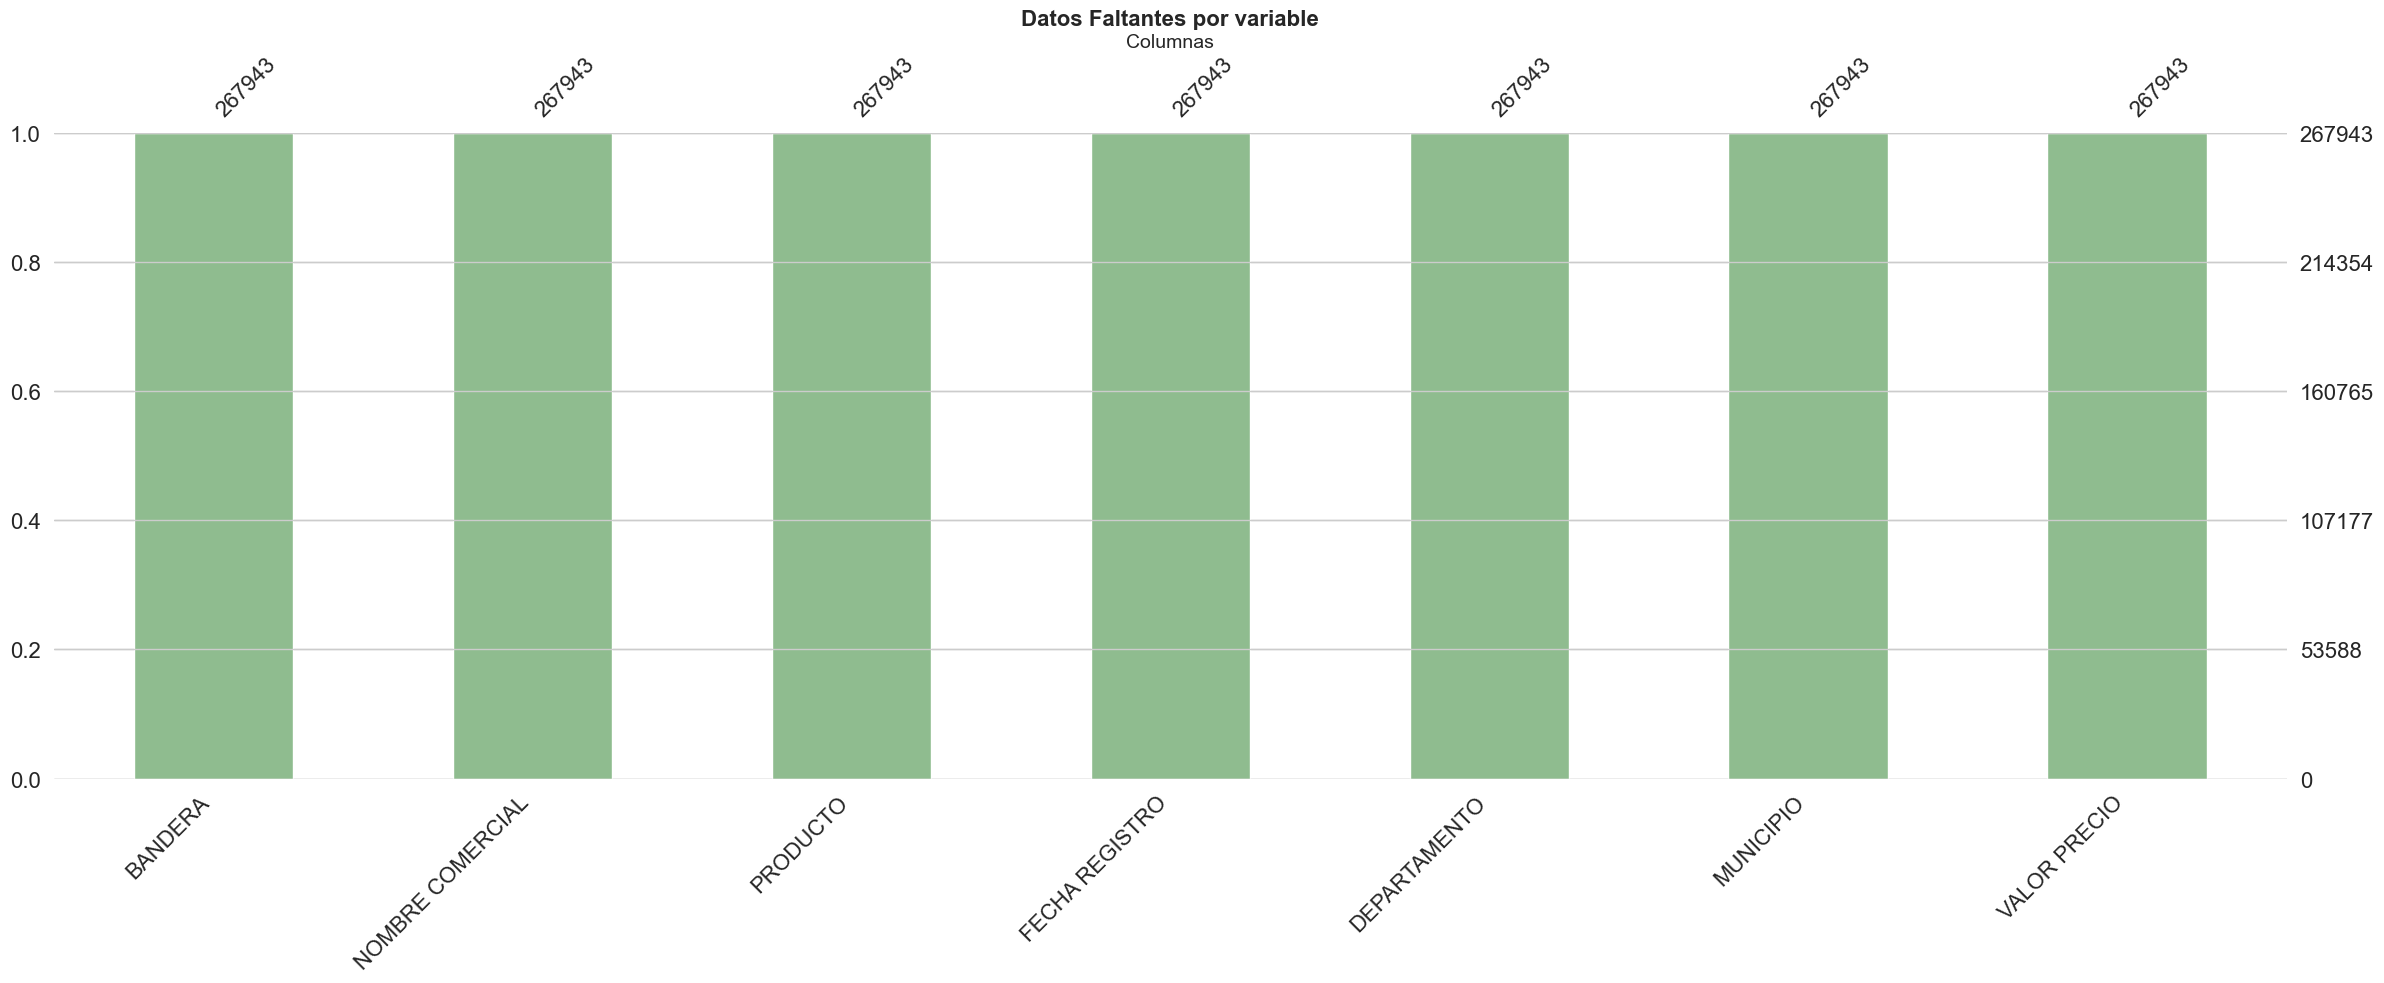

In [93]:
msno.bar(df_2023, color = "#8FBC8F", sort = 'ascending')
plt.title('Datos Faltantes por variable', fontsize = 16, fontweight = 'bold')
plt.xlabel('Columnas', fontsize = 14)
plt.ylabel('Porcentaje de Datos Faltantes', fontsize = 14)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

En la gráfica, podemos observar que todas las columnas tienen datos completos (sin valores faltantes), ya que los barras están completamente llenas hasta el nivel 1 en todas las columnas analizadas, lo que sugiere que no hay problemas de datos ausentes en este conjunto de datos.

## **Datos atípicos**

Para ver los datos atípicos y concentrarnos en la parte de la imputación de estos mismos, usaremos la variable de interés `VALOR PRECIO`. El primer paso para esto es observar el diagrama de cajas y bigotes el cual nos permitirá determinar que en efecto si hay datos atípicos. 

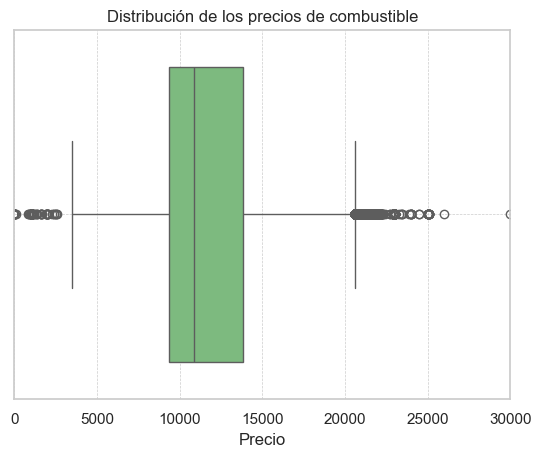

In [94]:
ax = sns.boxplot(data = df_2023, x = 'VALOR PRECIO', palette = 'Greens', orient = 'h')
ax.set_xlim(0, 30000)
ax.set_xlabel('Precio')
ax.set_title('Distribución de los precios de combustible')
sns.set_style("whitegrid") 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


En efecto, si hay presencia de datos atípicos en la variable `VALOR PRECIO`. Ahora veamos la cantidad exacta de datos atípicos existentes con el método de rango intercuartilico

In [95]:
Q1 = df_2023['VALOR PRECIO'].quantile(0.25)
Q3 = df_2023['VALOR PRECIO'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_2023[(df_2023['VALOR PRECIO'] < lower_bound) | (df_2023['VALOR PRECIO'] > upper_bound)]
print(f'Número de outliers detectados: {outliers.shape[0]}')

Número de outliers detectados: 2907


Veamos ahora su distribución.

In [96]:
# Prueba de Kolmogorov-Smirnov dado que es una muestra mayor a 30 observaciones
ks_test = stats.kstest(df_2023['VALOR PRECIO'], 'norm', args=(df_2023['VALOR PRECIO'].mean(), df_2023['VALOR PRECIO'].std()))
if ks_test.pvalue > 0.05:
    print("La variable 'VALOR PRECIO' sigue una distribución normal.")
else:
    print("La variable 'VALOR PRECIO' NO sigue una distribución normal.")


La variable 'VALOR PRECIO' NO sigue una distribución normal.


Dado que las observaciones de la variable `VALOR PRECIO` NO siguen una distribución normal se usará la mediana como método de imputación de los datos atípicos

In [97]:
mediana = df_2023['VALOR PRECIO'].median()
# Imputación de los datos atípicos
df_2023.loc[df_2023['VALOR PRECIO'] < lower_bound, 'VALOR PRECIO'] = mediana
df_2023.loc[df_2023['VALOR PRECIO'] > upper_bound, 'VALOR PRECIO'] = mediana

Veamos si la distribución se mantuvo

In [98]:
ks_test = stats.kstest(df_2023['VALOR PRECIO'], 'norm', args=(df_2023['VALOR PRECIO'].mean(), df_2023['VALOR PRECIO'].std()))
if ks_test.pvalue > 0.05:
    print("La variable 'VALOR PRECIO' sigue una distribución normal.")
else:
    print("La variable 'VALOR PRECIO' NO sigue una distribución normal.")


La variable 'VALOR PRECIO' NO sigue una distribución normal.


En efecto, la imputación fue realizada de manera exitosa dada que la distribución de los datos correspondientes a la variable `VALOR PRECIO` mantuvo su distribución 

Veamos ahora el diagrama de cajas y bigotes para confirmar la efectividad de la imputación.

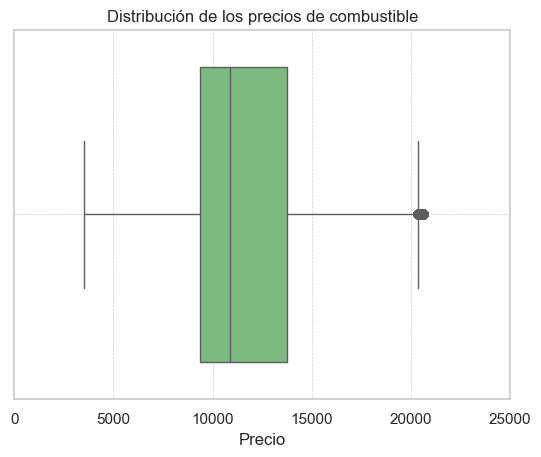

In [99]:
ax = sns.boxplot(data = df_2023, x = 'VALOR PRECIO', palette = 'Greens', orient = 'h')
ax.set_xlim(0, 25000)
ax.set_xlabel('Precio')
ax.set_title('Distribución de los precios de combustible')
sns.set_style("whitegrid") 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## **Filtración de la base de datos**

A continuación se filtra la base de datos por la variable `PRODUCTO`. En este caso se escogió el combustible de tipo "Gasolina Motor". Dicha categoría es estudiada más adelante con un mapa interactivo.

In [100]:
df_motor = df_2023[df_2023['PRODUCTO'] == 'GASOLINA MOTOR']
df_motor.head()

,BANDERA,NOMBRE COMERCIAL,PRODUCTO,FECHA REGISTRO,DEPARTAMENTO,MUNICIPIO,VALOR PRECIO
1,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LA PEDRERA,15500.00
2,TERPEL,BALSA EL CONDOR,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.00
4,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.00
5,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.00
7,TEXACO,EDS COMDECOM ABRIAQUI,GASOLINA MOTOR,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,11870.00


In [101]:
df_motor.shape

(127338, 7)

Luego de haber filtrado podemos afirmar que en la base de datos original, hay 127338 observaciones registradas acerca del combustible de tipo Gasolina Motor

## **Mapa Interactivo**

En esta parte se agrupan los datos del DataFrame df_motor según la columna `DEPARTAMENTO`, utilizando la función `groupby()`. Luego, se selecciona la columna `VALOR PRECIO` y se calcula la media de los precios dentro de cada grupo, es decir, se obtiene el precio promedio de la gasolina motor para cada departamento.

In [102]:
df_precios = df_motor.groupby('DEPARTAMENTO')['VALOR PRECIO'].mean().reset_index()
df_precios.loc[df_precios['DEPARTAMENTO'] == 'ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y PROVIDENCIA', 'DEPARTAMENTO'] = 'ARCHIPIELAGO DE SAN ANDRES'
df_precios['VALOR PRECIO'].describe()

count      33.00
mean    13031.77
std       906.87
min     10790.64
25%     12597.62
50%     12935.91
75%     13239.35
max     15150.81
Name: VALOR PRECIO, dtype: float64

El análisis estadístico de los precios medios de la gasolina motor por departamento en Colombia muestra que el precio promedio es de 13,031.77 pesos colombianos, con una desviación estándar de aproximadamente 906.87 pesos, lo que refleja una variabilidad moderada entre los departamentos. El precio mínimo registrado es de 10,790.64 pesos, mientras que el máximo alcanza los 15,150.81 pesos. La mediana se sitúa en 12,935.91 pesos, indicando que la mitad de los departamentos tienen precios por debajo de esta cifra y la otra mitad por encima. Estos datos sugieren que, aunque los precios varían entre departamentos, la mayoría se agrupa en torno a un rango central.

Ahora se utiliza la librería `geopandas` para leer un archivo shapefile (.shp), que contiene la información geoespacial de Colombia. Este objeto `mapa_col` contendrá tanto los datos geométricos como los límites de los departamentos, lo que permitirá su visualización en un mapa.

In [103]:
mapa_col = gpd.read_file("C:/Users/kamac/OneDrive/Desktop/VisualizacionUN/COLOMBIA/COLOMBIA.shp")
mapa_col.loc[mapa_col['DPTO_CNMBR'] == 'NARI?O', 'DPTO_CNMBR'] = 'NARIÑO'

En esta parte del código, se realiza una unión entre los dos DataFrames de intéres: `mapa_col`, que contiene la información geoespacial, y `df_precios`, que tiene datos sobre los precios de combustible por departamento. La fusión se hace utilizando como claves de unión la columna `DPTO_CNMBR` del DataFrame `mapa_col` y la columna `DEPARTAMENTO` del DataFrame `df_precios`. 

Se usa el parámetro `how = 'left'` para asegurar que se conserven todas las filas del DataFrame `mapa_col` (izquierda) y solo se agregarán datos de `df_precios` cuando coincidan los departamentos. Esto permite que el resultado sea un DataFrame que incluye tanto la información geoespacial como los valores de precios de combustible.



In [104]:
mapa_col = mapa_col.merge(df_precios[['DEPARTAMENTO','VALOR PRECIO']], 
                          left_on = 'DPTO_CNMBR', 
                          right_on = 'DEPARTAMENTO', 
                          how = 'left')

In [105]:
tablaa = df_motor.groupby('DEPARTAMENTO')['VALOR PRECIO'].mean().reset_index()
tablaa.columns = ['Departamento', 'Precio promedio de gasolina motor']
print(tabulate(tablaa, headers = 'keys', tablefmt = 'fancy_grid', showindex=False))

╒══════════════════════════════════════════════════════════╤═════════════════════════════════════╕
│ Departamento                                             │   Precio promedio de gasolina motor │
╞══════════════════════════════════════════════════════════╪═════════════════════════════════════╡
│ AMAZONAS                                                 │                             15150.8 │
├──────────────────────────────────────────────────────────┼─────────────────────────────────────┤
│ ANTIOQUIA                                                │                             13088.2 │
├──────────────────────────────────────────────────────────┼─────────────────────────────────────┤
│ ARAUCA                                                   │                             12787.5 │
├──────────────────────────────────────────────────────────┼─────────────────────────────────────┤
│ ARCHIPIELAGO DE SAN ANDRES, SANTA CATALINA Y PROVIDENCIA │                             14225   │
├─────────

Finalmente, graficamos el mapa interactivo donde se puede ver la variabilidad de precios del combustible gasolina motor dependiendo el departamento donde está ubicado

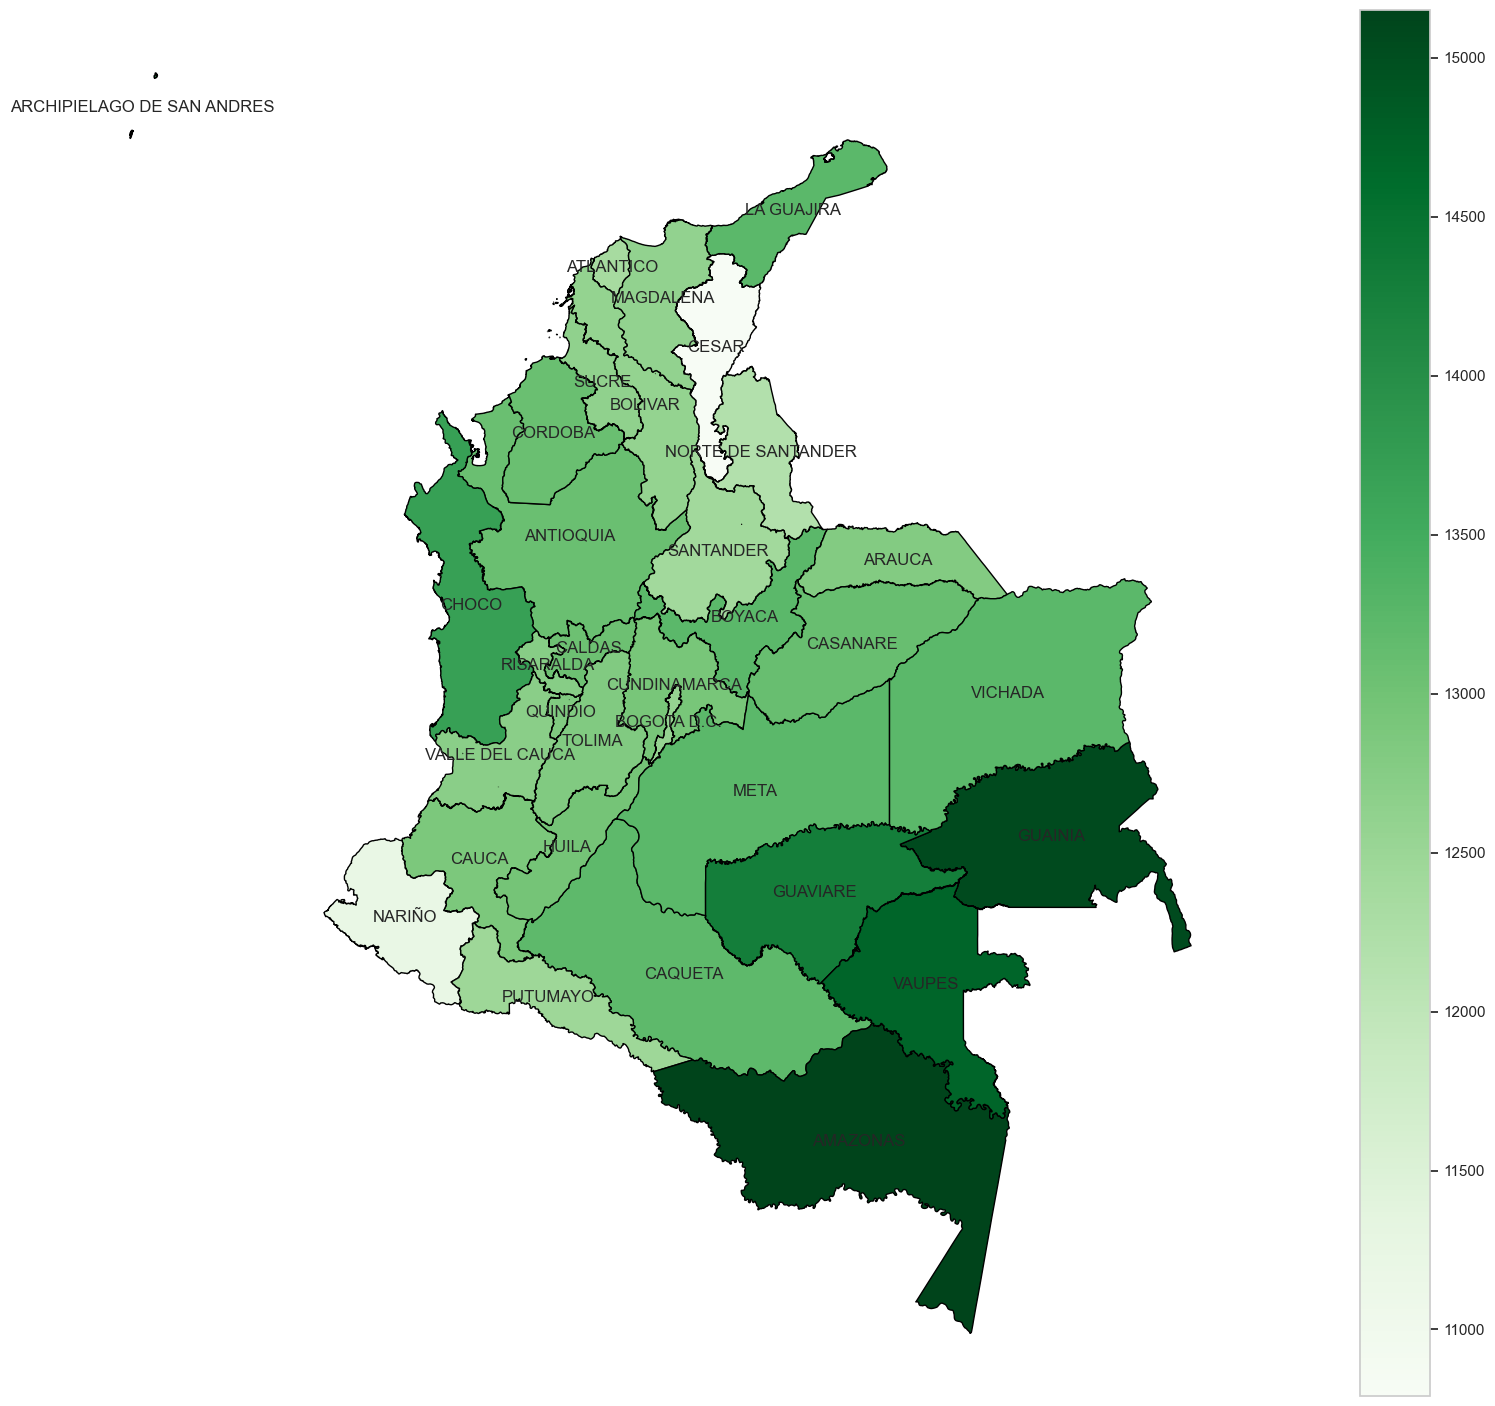

In [106]:
mapa_col.plot(column = "VALOR PRECIO",figsize = (30,18), legend = True, edgecolor = "black", colormap = 'Greens' )
for index,row in mapa_col.iterrows(): # Los siguientes códigos permiten incluir los nombres de los municipios
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    plt.annotate(row['DEPARTAMENTO'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center')
    plt.axis('off')

Este mapa ilustra la distribución de los precios del combustible tipo gasolina motor en los distintos departamentos de Colombia, con valores que oscilan entre 12,184 y 15,151 pesos. Los departamentos de Amazonas y Guainía se destacan por tener los precios más altos, mientras que Nariño y Cundinamarca registran los precios más bajos. Los tonos más oscuros en el mapa identifican las regiones donde la gasolina es más costosa, evidenciando una variabilidad notable en los costos de combustible en todo el país. En general, se observa que los departamentos ubicados en el sureste, como Amazonas, tienden a tener los precios más elevados, en contraste con los departamentos del centro y norte, que muestran precios más bajos. Esto sugiere una posible relación entre la ubicación geográfica y el costo del combustible.

# **PRUEBA**

> **Note**  
> Este mapa ilustra la distribución de los precios del combustible tipo gasolina motor en los distintos departamentos de Colombia, con valores que oscilan entre 12,184 y 15,151 pesos. Los departamentos de Amazonas y Guainía se destacan por tener los precios más altos, mientras que Nariño y Cundinamarca registran los precios más bajos. Los tonos más oscuros en el mapa identifican las regiones donde la gasolina es más costosa, evidenciando una variabilidad notable en los costos de combustible en todo el país. En general, se observa que los departamentos ubicados en el sureste, como Amazonas, tienden a tener los precios más elevados, en contraste con los departamentos del centro y norte, que muestran precios más bajos. Esto sugiere una posible relación entre la ubicación geográfica y el costo del combustible.



```{note}
Este mapa ilustra la distribución de los precios del combustible tipo gasolina motor en los distintos departamentos de Colombia, con valores que oscilan entre 12,184 y 15,151 pesos. Los departamentos de Amazonas y Guainía se destacan por tener los precios más altos, mientras que Nariño y Cundinamarca registran los precios más bajos. Los tonos más oscuros en el mapa identifican las regiones donde la gasolina es más costosa, evidenciando una variabilidad notable en los costos de combustible en todo el país. En general, se observa que los departamentos ubicados en el sureste, como Amazonas, tienden a tener los precios más elevados, en contraste con los departamentos del centro y norte, que muestran precios más bajos. Esto sugiere una posible relación entre la ubicación geográfica y el costo del combustible.
```


```{note}
Este mapa ilustra la distribución de los precios del combustible tipo gasolina motor en los distintos departamentos de Colombia, con valores que oscilan entre 12,184 y 15,151 pesos. Los departamentos de Amazonas y Guainía se destacan por tener los precios más altos, mientras que Nariño y Cundinamarca registran los precios más bajos. Los tonos más oscuros en el mapa identifican las regiones donde la gasolina es más costosa, evidenciando una variabilidad notable en los costos de combustible en todo el país. En general, se observa que los departamentos ubicados en el sureste, como Amazonas, tienden a tener los precios más elevados, en contraste con los departamentos del centro y norte, que muestran precios más bajos. Esto sugiere una posible relación entre la ubicación geográfica y el costo del combustible.
```